# CE-157 Problem Set 3

Run the 3 cells below and continue onwards! They're just needed to run the initial code needed to run the rest of the functions in this problem set.

In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datascience import *
import pandas as pd
import numpy as np
import xlrd

In [2]:
temp = Table.read_table("ProblemSet3Data.csv").relabeled('Unnamed: 0', 'Countries')
problem_set = Table()
for name in temp.labels:
    if name == 'Population 2010' or name == 'Historical Emissions A\nCumulative CO2 emissions from energy, 1850–2007 (million tonnes)':
        array = make_array()
        for entry in temp.column(name):
            array = np.append(array, float(entry.replace(",","")))
        problem_set = problem_set.with_column(name, array)#temp.apply(lambda x: float(x.replace(',', '')), column_name))
    else:
        problem_set = problem_set.with_column(name, temp.column(name))

### Shortcuts for column names:

In [3]:
countries = 'Countries'
co2_cummulative = 'Historical Emissions A\nCumulative CO2 emissions from energy, 1850–2007 (million tonnes)'
ghg_cummulative = 'Historical Emissions B\nCumulative GHG Emissions, 1990-2010  (million tonnes CO2 equivalent)'
ghg_2010 = 'Current GHG Emissions\nTotal GHG Emissions, 2010  (million tonnes CO2 equivalent)'
co2_2011 = 'Current CO2 Emissions\nCO2 emissions from fossil fuel combustion, 2011 (million tonnes)'
change_1971_2011 = 'Change from 1971–2011 (%)'
change_1990_2011 = 'Change from 1990–2011 (%)'
total_footprint = 'Total carbon footprint\nFootprint of all goods and services consumed (million tonnes CO2 equivalent)'
pop_2010 = 'Population 2010'
gdp_ppp_2010 = 'GDP-PPP 2010 (Million $ (2005))'
hdi_2011 = 'HDI, 2011'
hdi_change_1990_2011 = 'HDI Change from 1990-2011 (%)'
gender_inequality_2012 = 'Gender Inequality Index Value, 2012'
maternal_2010 = 'Maternal Mortality Ratio, 2010'

In [4]:
table_names = [countries, co2_cummulative, ghg_cummulative, ghg_2010, co2_2011, change_1971_2011, change_1990_2011, total_footprint, 
               pop_2010, gdp_ppp_2010, hdi_2011, hdi_change_1990_2011, gender_inequality_2012, maternal_2010]

Column Name: Historical Emissions A Cumulative CO2 emission from energy, 1850-2007 (million tonnes) <br>
Shortcut: "co2_emissions"

Historical Emissions B Cumulative GHG Emissions, 1990-2010 (million tonnes CO2 equivalent) <br>
Shortcut: "ghg_emissions"

Current GHG Emissions Total GHG Emissions, 2010 (million tonnes CO2 equivalent) <br>
Shortcut: "ghg_2010_emissions"

Current CO2 Emissions CO2 emissions from fossil fuel combustion, 2011 (million tonnes) <br>
Shortcut: "co2_2011_emissions"

Change from 1971–2011 (%) <br>
Shortcut: "change_1971_2011"

Change from 1990–2011 (%) <br>
Shortcut: "change_1990_2011"

Total carbon footprint Footprint of all goods and services consumed (million tonnes CO2 equivalent) <br>
Shortcut: "total_footprint"

Population 2010 <br>
Shortcut: "pop_2010"

GDP-PPP 2010 (Million $ (2005)) <br>
Shortcut: "gdp-ppp_2010"

HDI, 2011 <br>
Shortcut: "hdi_2011"

HDI Change from 1990-2011 (%) <br>
Shortcut: "hdi_change_1990_2011"

Gender Inequality Index Value, 2012 <br>
Shortcut: "gender_inequality_2012"

Maternal Mortality Ratio, 2010 <br>
Shortcut: "maternal_2010"

|Column Name   | Contents | 
|--------------|---------|
|co2_emissions |Historical Emissions A Cumulative CO2 emission from energy, 1850-2007 (million tonnes) |
|ghg_emissions | Historical Emissions B Cumulative GHG Emissions, 1990-2010 (million tonnes CO2 equivalent) |
|ghg_2010_emissions| Current GHG Emissions Total GHG Emissions, 2010 (million tonnes CO2 equivalent)|
|co2_2011_emissions|Current CO2 Emissions CO2 emissions from fossil fuel combustion, 2011 (million tonnes) |
|change_1971_2011|Change from 1971–2011 (%) |
|change_1990_2011|Change from 1990–2011 (%) |
|total_footprint|Total carbon footprint Footprint of all goods and services consumed (million tonnes CO2 equivalent) |
|pop_2010|Population 2010|
|gdp_ppp_2010|GDP-PPP 2010 (Million $ (2005))|
|hdi_2011|HDI, 2011 |
|hdi_change_1990_2011|HDI Change from 1990-2011 (%) |
|gender_inequality_2012|Gender Inequality Index Value, 2012 |
|maternal_2010|Maternal Mortality Ratio, 2010 |

#### Alright! Let's begin!

In this problem set, you will dive into some publicly available data on climate change, economic growth, and human development in an attempt to understand a little about the complex relationships between these parameters. With each chart you create, be sure to label your axes, create a chart title, and provide a simple regression line (including the R2 value). Note that you don’t need a chart legend if you only have one set of data. Remember – presentation is important! Also remember that a robust analysis would use far more in depth statistics, in particular focusing on each component of your regression model, both the size of the effect of each component as well as the significance, but for the purposes of this problem set linear regression slopes and R2 values will do.



#### Table of Contents 

1 - [Introduction to Ploting](#section1)<br>

2 - [Correlation](#section2)<br>

3 - [Regression](#section3)<br>

4 - [Questions](#section4)<br>




The data is in a table named `problem_set` (Run the next cell to see what it looks like).

In [5]:
problem_set

Countries,co2_emissions,ghg_emissions,ghg_2010 emissions,co2_2011_emissions,change_1971_2011,change_1990_2011,total_footprint,pop_2010,gdp_ppp_2010,hdi_2011,hdi_change_1990_2011,gender_inequality_2012,maternal_2010
Afghanistan,72.4,349.34,24.94,nan,nan,nan,nan,"28,397,812",33596,0.371,50.81,0.712,460
Albania,227.9,143.81,6.57,3.9,-0.3,-38,5.4,"3,150,143",24545,0.748,13.16,0.251,27
Algeria,"2,272.40",2618.81,169.42,103.9,1064.8,97,nan,"37,062,820",269075,0.711,26.51,0.391,97
Angola,305.3,3300.97,219.84,15.7,845.5,292,nan,"19,549,124",98686,0.504,nan,nan,450
Antigua & Barbuda,16.6,14.17,1.2,nan,nan,nan,nan,"87,233",1541,0.759,nan,nan,nan
Argentina,"5,894.80",6308.23,359.01,183.6,121.8,83.8,165.5,"40,374,224",580427,0.81,15.55,0.38,77
Armenia,505.6,183.45,13.43,4.7,nan,-77.2,6,"2,963,496",15153,0.726,15.61,0.34,30
Australia,"13,108.50",10252.5,587.53,396.8,175.3,52.6,297,"22,065,300",763921,0.936,6.36,0.115,7
Austria,"4,541.90",1712.92,84.28,68.5,40.6,21.4,99.8,"8,389,771",296268,0.894,12.17,0.102,4
Azerbaijan,"2,323.70",1218.83,64.21,26.8,nan,-51.3,30.3,"9,054,332",80696,0.732,nan,0.323,43


## Introduction to Ploting <a id='section1'></a>
### A quick tutorial on how to plot with Numpy and Matplotlib

When plotting with Numpy and Matplotlib, there are a few functions that come in quite handy:
   - Plot
   - Scatter
   
Using plot, you're able to take any two columns of a table, and plot them quite easily! For example, if I wanted to plot Total GHG Emissions, 2010 vs. HDI, I could do:

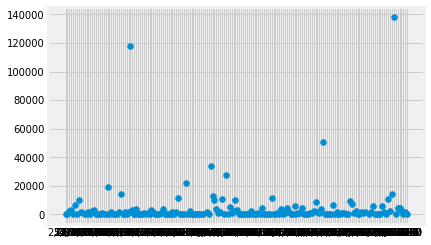

In [6]:
plt.scatter(problem_set["co2_emissions"], problem_set["ghg_emissions"])

Hooray! You created your first plot. However, as it is, this plot is very hard to interpret and understand. There is a lot more work to be done to improve this plot. You can use functions such as 

* plt.xlabel()
* plt.ylabel()
* plt.title()

to enhance your plot to make it more readable. 

Hint: You know you created a good plot when someone else can see the image and know what you are talking about without having to read any extra documentation. 



## Correlation <a id='section2'></a>



The correlation coefficient ranges from −1 to 1. A 1 implies that X and Y are moving together in perfect accord, which means they have a "perfect reltionship". We would expect the Y values to fall in a perfect stright line with a positve slope. A −1 implies that all data points lie on a straight line for which an X increase is reflected in a Y decrease. 0 implies that there is no linear correlation was found between the variables.


In [7]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x)  

def correlation(t, label_x, label_y):
    "Determines the correlation between the x and y variables"
    x_in_standard_units = standard_units(t.column(label_x))
    y_in_standard_units = standard_units(t.column(label_y))
    return np.average(x_in_standard_units * y_in_standard_units)

## Regression <a id='section3'></a>

## Questions <a id='section4'></a>


### IMPORTANT

When you explain your graphs below, do not describe them but instead interpret and explain them. Are there any correlations (or lack of)? Is there anything else that we may learn from the graph?

Finally, the scatter plots you are asked to create are written below using the standard convention of dependent vs. independent (i.e. “plot Y vs. X”).

### Question 1

Make a chart of Total GHG Emissions, 2010 vs. GDP. 

In [8]:
# YOUR CODE HERE

What do you notice? Why do you think your plot looks this way? Write down a few thoughts about why you think your plot looks like this

Note that there are missing data! (welcome to the ‘real world’). If, when your calculations, you don't exclude (i.e. delete) these, you will possibly run across some errors, and some meaningless results! (For example, if you were to try to calculate the "Per-Capita CO2 Emission from Fossil Fuel Consumption" of Afghanistan, you would get a result of zero because the emission data is missing. 


If you plotted this and used it to determine your linear regression, your regression would obviously be meaningless.)

<img src="error_pic.png" height='50' width='850'>

So, in order to avoid these issues, we've created a function to remove all the non-integers from the columns! The function is in the cell below.

In [9]:
def clean(x, y):
    """
    Takes in two column indices of "problem_set", x and y, in that respective order. Returns a list with two lists
    composed of the two column indices from the table "problem_set".
    """
    combined, x, y = list(zip(problem_set[x], problem_set[y])), [], []
    for pair in combined:
        if pair[0] != "" and pair[1] != "":
            x.append(pair[0])
            y.append(pair[1])
    return [x, y]

* When getting your results from the clean function, make sure to index into the 0th element ([0]) to get the x-values, and index into the 1st element([1]) to get the y-values.

* For example, clean(0, 1) returns the valid data points between the first two columns in the problem_set table. If we set result to equal clean(0, 1) (result = clean(0, 1)), then we can get the x-column with result[0] and the y-column with result[1].

Note: With the function "clean" above, you should be able to perform any graphing you may be asked to do.

You can look at the code below see how you can use the `clean` function on your plots. 

In [ ]:
# # plt.scatter(np.asarray(clean(1,2)[0]), np.asarray(clean(1,2)[1]))# # plt 
# # x = np.random.rand(10)
# # y = np.random.rand(10)
# # print(type(x))
# # plt.scatter(x, y)
# x = np.asarray(clean(1,2)[0][:10])
# # print(type(z))
# y = np.asarray(clean(1,2)[1][:10])
# plt.yticks(np.arange(0, 10000, 1000))
# plt.scatter(x, y)

In [10]:
# YOUR CODE HERE

Explain your result in 2-3 sentences.

### Question 2

Make a chart of Per-Capita Total GHG Emissions, 2010 vs. HDI. 


Hint: One way to do this is by adding a new column by `dataframe['new column name'] = [data]`. e.g. add a column called `per_capital_total_GHG` to the `problem_set` table. 

In [11]:
# YOUR CODE HERE

Explain your result in 2-3 sentences.

### Question 3

Make a chart of Cumulative CO2 Emissions from Energy (1850-2007) Rank vs. HDI Rank.

Hint: Order the countries in descending order accoridng to the "Cumulative CO2 Emissions from Emergy" variable. 

In [12]:
# YOUR CODE HERE

Explain your result in 2-3 sentences.

### Question 4

Make a chart of Cumulative CO2 Emissions from Energy (1850-2007) Per Capita Rank vs. HDI Rank. 

In [13]:
# YOUR CODE HERE

Explain your result in 2-3 sentences.

### Question 5

Which country has the highest Total GHG Emissions in 2010? Where do they rank on the per-capita scale? Which country has the highest per-capita?

In [14]:
# YOUR CODE HERE

Explain your result in 2-3 sentences.

### Question 6

Which country has the highest “Footprint of all goods and services consumed”? Which has the highest per-capita? 

In [15]:
# YOUR CODE HERE

Explain your result in 2-3 sentences.

### Question 7

Go to www.gapminder.org/tools. Create an animated graph that tells you something interesting about climate change (CO2 Emissions should be on one axis). Note you can change an axis by clicking on the axis label and selecting a new measure from the various options. Take a screenshot of one year (be careful – sometimes the most recent data doesn’t include many countries, so take a screenshot that includes most of the world) and include that with your assignment. 

Insert image below. 

![alt text](imagename.png "Title")


Explain your results

### Question 8(a)

Reflect on your findings.

Do you think per-capita or total national emissions are the more appropriate way to do carbon accounting, and why?

### Question 8(b)

Do you think accounting should be based on what a country emits within its boundaries, or what a country consumes, including emissions from the production of goods elsewhere?

### Question 8(c)

Do you think countries should reduce their emissions in proportion to 

i) their past emissions

ii) their level of development & capacity to reduce

iii) the degree to which they will be impacted by climate change

iv) a combination of these, or something else (explain)